## Create data

##### REMEMEBR YOU DON'T HAVE TO HIT IT OUT OF THE PARK EVERY TIME.

What is the data needed to be created?

    -Needs to start continuous.
    -Needs to have some hierarchy. 
    -Create two parents feeding a single child, first. 
    -Then create two parents feeding two children. 

    -They will be correlation among the data. What we have noticed. 
    -Can derive some form of conditional distribution.

CONSIDERATIONS:
    Will anomaly detection strengthen or weaken with addition or more variables. 
    Matt wants a single value to determine the probility of observing the current value given the surrounding values. 
        Does anomaly detection simply give a the 'probability'/what is this distribution of an  anomaly?
        How to take an ensemble of anomaly values? What does the voting system actually mean? 
    
    Is that data truly Gaussian? It seems to just have a few outliers. 
    Can include informant tag rules.

Advantages:
    Information is for the most part direct acyclical (DAG).
    Captures temporal data (if empirical distribution is used).
    Able to directly apply physical rules to network i.e. knowledge of plant.
    Will condense a set of observations down to a single probability.
    Easy to add informant analysis into the model i.e. informant tags or additional information. 
    Able to add in work on anomaly detection.
    State of art neural networks these methods as post processing CRF-LSTM.
    Reasoning can be both *casual* and *evidental* (both ways of the graph are covered.  
   

Disadvantages:
    Need to understand the structure of the plant. 
    

In [ ]:
Ways to move project forward:
    Include 

In [91]:
import numpy as np
from scipy.stats.mstats import mquantiles
import pandas as pd

In [ ]:
# Create distributions 


In [17]:
import matplotlib.pyplot as plt
from libpgm.graphskeleton import GraphSkeleton
from libpgm.nodedata import NodeData
from libpgm.discretebayesiannetwork import DiscreteBayesianNetwork
from libpgm.tablecpdfactorization import TableCPDFactorization
def getTableCPD():
    nd = NodeData()
    skel = GraphSkeleton()
    jsonpath="Building_Probabilistic_Graphical_Models_in_Python/chap02/job_interview.txt"
    nd.load(jsonpath)
    skel.load(jsonpath)
    # load bayesian network
    bn = DiscreteBayesianNetwork(skel, nd)
    tablecpd=TableCPDFactorization(bn)
    return tablecpd

In [12]:
# Below we can calculate the 
tcpd=getTableCPD()
print("For the unconditioned probability of a positive job offer: {0}".format(tcpd.specificquery(dict(Offer='1'),dict())))

# Now we can condition on upstream meters
tcpd=getTableCPD()
print("Conditioned on poor grades value, the probability of a job off is: {0}".format(tcpd.specificquery(dict(Offer='1'),dict(Grades='0'))))



For the unconditioned probability of a positive job offer: 0.432816
Conditioned on poor grades value, the probability of a job off is: 0.35148


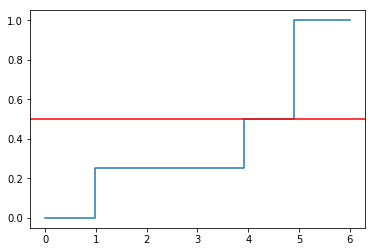

In [35]:
from statsmodels.distributions.empirical_distribution import ECDF
sample = [5,5,1,4]
ecdf = ECDF(sample)
x = np.linspace(min(sample)-1, max(sample)+1)
y = ecdf(x)
plt.step(x, y)
plt.axhline(0.5, color="red")
plt.show()

In [39]:
print(np.percentile(sample, [50,75]))
mquantiles([5,5,1,4])

[4.5 5. ]


array([2.35, 4.5 , 5.  ])

100


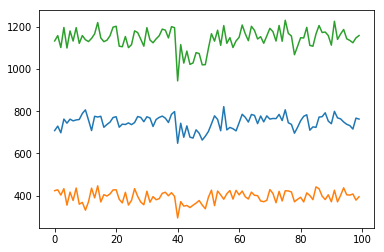

In [85]:
F418 = np.random.normal(750, 25, 100)
F402 = np.random.normal(400, 25, 100)

F418[40:50] = F418[40:50] - 50
F402[40:50] = F402[40:50] - 50
summed = F418 + F402
print(len(summed))
np.histogram(summed, bins=10)
plt.plot(range(100),F418)
plt.plot(range(100),F402)
plt.plot(range(100),summed)
plt.show()

In [137]:
my_quantiles = mquantiles(F418,[0.2,0.4,0.6,0.8,1.0])
F418df = pd.DataFrame(F418)

F418df['prob_value'] = factor_level(F418df[0], my_quantiles)


The current x data 708.468124287
The current x data 729.577184618
The current x data 698.078058867
The current x data 762.783773173
The current x data 743.49049617
The current x data 762.467949203
The current x data 754.460210099
The current x data 758.859990173
The current x data 760.927304796
The current x data 789.415200735
The current x data 806.472642534
The current x data 758.471731258
The current x data 708.704694016
The current x data 776.027512981
The current x data 772.586147706
The current x data 776.121004496
The current x data 724.042298552
The current x data 737.229977088
The current x data 748.432132477
The current x data 770.227073977
The current x data 773.956382358
The current x data 724.464408652
The current x data 738.887159399
The current x data 737.199000432
The current x data 744.799748351
The current x data 736.659055559
The current x data 746.459065384
The current x data 774.851682291
The current x data 770.754736233
The current x data 750.426306262
The current

ValueError: Length of values does not match length of index

In [88]:
mquantiles(F402,[0.2,0.4,0.6,0.8,1.0])

array([370.83582083, 383.79683606, 403.72634015, 422.36456022,
       447.00707324])

In [89]:
mquantiles(summed,[0.2,0.4,0.6,0.8,1.0])
pd.DataFrame()

array([1109.46629197, 1135.568689  , 1156.71146537, 1183.67160784,
       1230.54046126])

In [135]:
def factor_level(data, quantile): 
    q_levels = [index + 1 for index in range(len(quantile))]
    counter = 0
    prob_identify = []
    for x in data:
        print("The current x data {0}".format(x))
        counter += 1
        for i in range(len(quantile)-1): 
            if x < q_levels[i]:
                prob_identify.append("0")
            elif x > q_levels[i]:
                prob_identify.append(str(i + 2))
            elif q_levels[i] <= x < q_levels[i+1]:
                prob_identify.append(str(i + 1))
    return prob_identify
  
    

In [ ]:
def calculate_prob_interval(mass_per_interval, sample): 
    min_sample = min(sample)
    max_sample = max(sample)
    prev_int_left = min(sample)
    ecdf = ECDF(sample)
    current_prob = 0.
    current_mass = mass_per_interval
    sorted_sample = np.sort(sample)
    mass_tuples = []
    for index,value in enumerate(sorted_sample):
        prob_height = 
        if current_prob/ecdf(value) <= sorted_sample[index + 1]:
            mass_tuples = [(prev_int_left, mass_per_interval)]
            current_prob = mass_per_interval
        else:
            mass_per_interval = mass_per_interval - (sorted_sample - value)
            
    
    
    
    